# EDA + Missing values and Outliers - Detection and Treatment + Model Building and MORE 😁

# INNOMATICS RESEARCH LABS
# EXPLORATORY DATA ANALYSIS 
# TASK - 2

Perform below mentioned tasks:  
Step - 1 - Introduction -> Give a detailed data description and objective  
Step - 2 - Import the data and perform basic pandas operations   
Step - 3 - Univariate Analysis -> PDF, Histograms, Boxplots, Countplots, etc..   
Understand the probability and frequency distribution of each numerical column  
Understand the frequency distribution of each categorical Variable/Column
Mention observations after each plot   
Step - 4 - Bivariate Analysis  
Discover the relationships between numerical columns using Scatter plots, hexbin plots, pair plots, etc..  
Identify the patterns between categorical and numerical columns using swarmplot, boxplot, barplot, etc..  
  
Mention observations after each plot.  
Step - 5 - In the above steps you might have encountered many missing values and outliers   
Find and treat the outliers and missing values in each column 😥  
  
Read this Kaggle Notebook and understand various ways to detect and handle outliers. Try to implement the same. Outlier!!! The Silent Killer  
Step - 6 - Apply appropriate hypothesis tests to verify the below mentioned questions  
Is there a relationship between occupation and gender? (i.e. does the preference of occupation depend on the gender)  
Is there a relationship between gender and income?  
You are free to explore other tests also.  
  
Conclusion of EDA  
NOTE: Mention observations and insights clearly.🙄  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
Data = pd.read_csv('adult.csv')
Data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
Data.shape

(48842, 15)

In [5]:
Data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [6]:
Data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
Data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [8]:
print("The Object or categorical Features and the unique values in the data are:")
print('=====================================================================================')
print('')
print('')

for i in Data.columns:
    if Data[i].dtypes == 'object':
        print(i)
        print('============================================================================')
       
        print(Data[i].unique())
        print('============================================================================')
        print('')
        print('')

The Object or categorical Features and the unique values in the data are:


workclass
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


education
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']


marital-status
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']


occupation
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']


relationship
['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']


race
['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']


gender
['Male' 'Female']


native-country
['United-States

In [9]:
print("The Numerical Features and the unique values in the data are:")
print('=====================================================================================')
print('')
print('')

for i in Data.columns:
    if Data[i].dtypes == 'int64':
        print(i)
        print('============================================================================')
       
        print(Data[i].unique())
        print('============================================================================')
        print('')
        print('')

The Numerical Features and the unique values in the data are:


age
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]


fnlwgt
[226802  89814 336951 ... 129912 255835 257302]


educational-num
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]


capital-gain
[    0  7688  3103  6418  7298  3908 14084  5178 15024 99999  2597  2907
  4650  6497  1055  5013 27828  4934  4064  3674  2174 10605  3418   114
  2580  3411  4508  4386  8614 13550  6849  2463  3137  2885  2964  1471
 10566  2354  1424  1455  3325  4416 25236   594  2105  4787  2829   401
  4865  1264  1506 10520  3464  2653 20051  4101  1797  2407  3471  1086
  1848 14344  1151  2993  2290 15020  9386  2202  3818  2176  5455 11678
  7978  7262  6514 41310  3456  7430  2414  2062 34095  1831  6723  5060
 15831  2977  2346  3273  2329  9562  2635  4931  1731

In [10]:
print("Lets see the description of the numerical columns")
print('=====================================================================================')
Data.describe()

Lets see the description of the numerical columns


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Since we can see various miscalleneous data in our dataset lets convert the unnecessary symbols into the null values

In [21]:
# Remove the ? sign and assign those as nan values
for i in Data.columns:
    Data[i]=Data[i].replace('?',np.nan)

In [23]:
print("Null values count the updated data")
Data.isnull().sum()

Null values count the updated data


age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

Now we can see the 3 features having the null values  
Removing all the instances from the data wont be efficent as we need to reove 2809 instances from a data  
And since all the features are categorical best way to solve the issue is to impute the mode on the null values.

In [27]:
Data['workclass'] = Data['workclass'].fillna(Data['workclass'].mode()[0])
Data['occupation'] = Data['occupation'].fillna(Data['occupation'].mode()[0])
Data['native-country'] = Data['native-country'].fillna(Data['native-country'].mode()[0])


In [28]:
Data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Now the issue of miscalleneous data and the null value is solved.

## Lets deal with the duplicated values then

In [30]:
print("We have {} total duplicated values in the data".format(Data.duplicated().sum()))

We have 53 total duplicated values in the data


So lets remove these duplicated entries

In [31]:
Data = Data.drop_duplicates(keep= 'first')

In [32]:
print("We have {} total duplicated values in the data".format(Data.duplicated().sum()))

We have 0 total duplicated values in the data


## Lets Head On Towards EDA for the numerical columns

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The maximum age is 90
The minimum age is 17


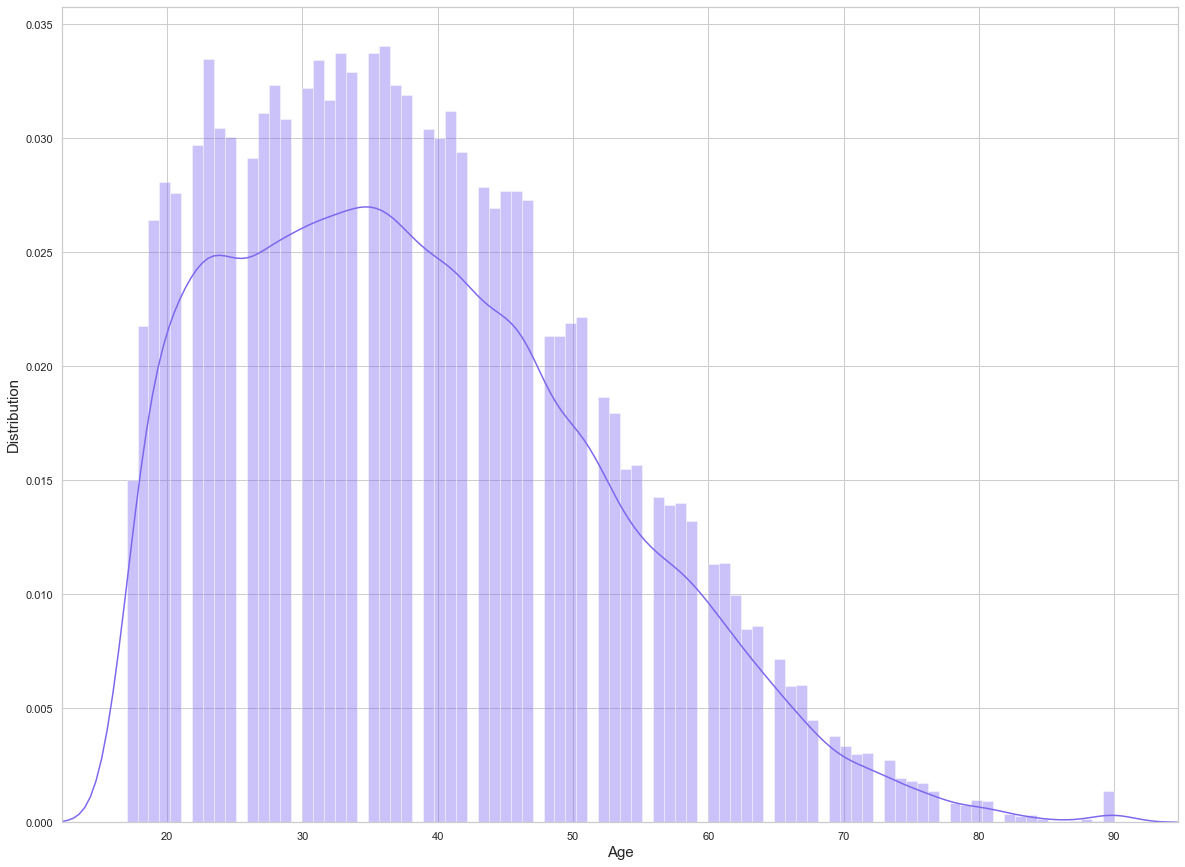

In [36]:
# This distribution plot shows the distribution of Age of people across the Data Set
plt.rcParams['figure.figsize'] = [20, 15]
sns.set(style = 'whitegrid')

sns.distplot(Data['age'], bins = 90, color = 'mediumslateblue')
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.margins(x = 0)

print ("The maximum age is", Data['age'].max())
print ("The minimum age is", Data['age'].min())

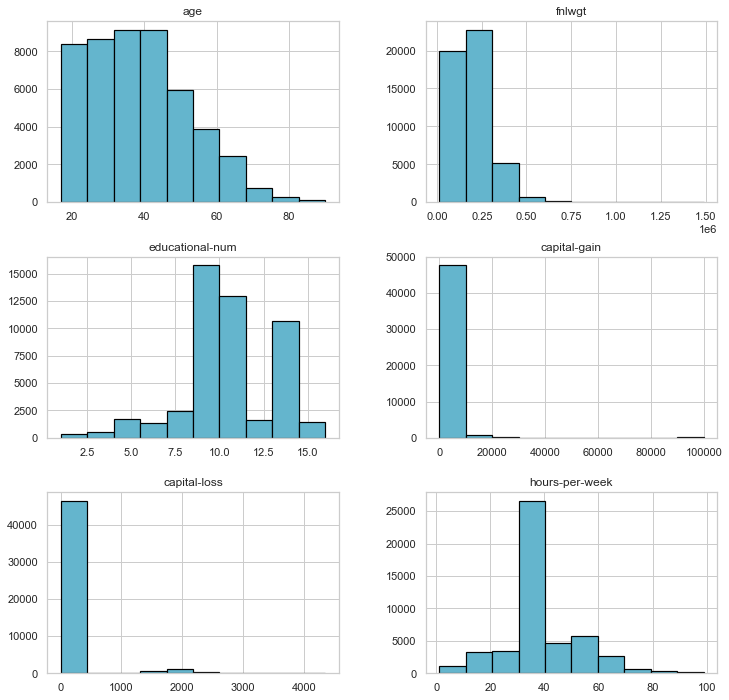

In [37]:
# Distribution of Different Features of the Dataset
distribution = Data.hist(edgecolor = 'black', linewidth = 1.2, color = 'c')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [40]:
# Checking the Difference between the values of the mean and median to get an idea about the amount of outliers
print ("median:",Data['hours-per-week'].median())
print ("mode:",Data['hours-per-week'].mean())

median: 40.0
mode: 40.42589518129086


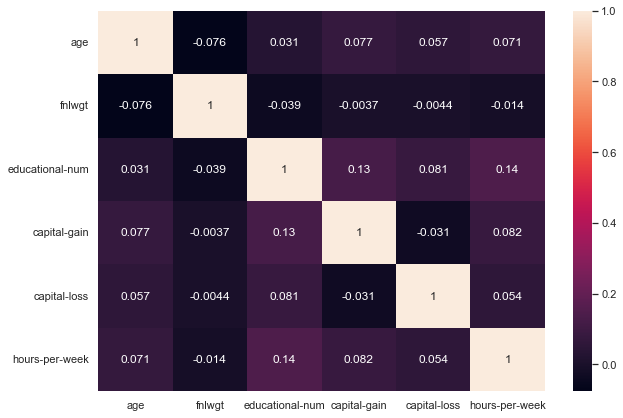

In [41]:
# This heatmap shows the Correlation between the different variables
plt.rcParams['figure.figsize'] = [10,7]
sns.heatmap(Data.corr(), annot = True);

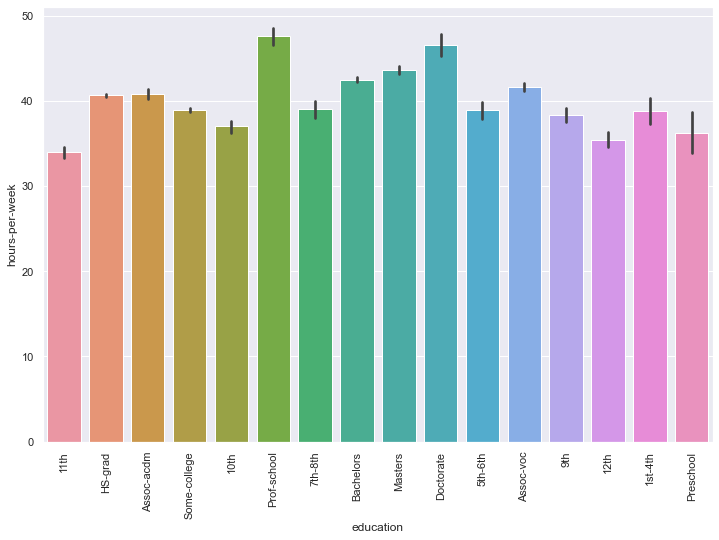

In [43]:
# This shows the hours per week according to the education of the person
sns.set(rc={'figure.figsize':(12,8)})
sns_grad = sns.barplot(x = Data['education'], y = Data['hours-per-week'], data = Data)
plt.setp(sns_grad.get_xticklabels(), rotation=90);

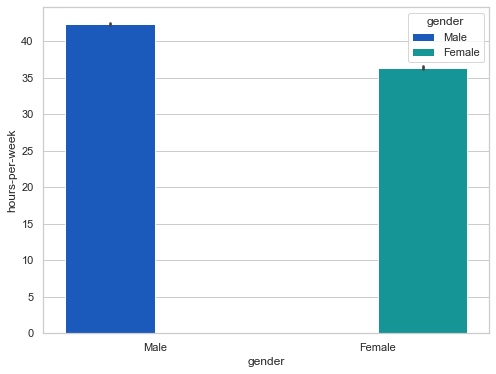

In [47]:
# This bar graph shows the difference of hours per week between male and female 
sns.set(style = 'whitegrid', rc={'figure.figsize':(8,6)})
sns.barplot(x = Data['gender'], y = Data['hours-per-week'], data = Data, hue = 'gender', palette = 'winter');

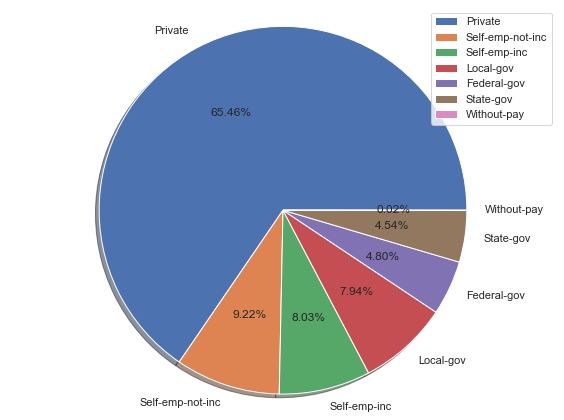

In [48]:
# Creating Pandas Series for the workclasses whose income is higher than 50K 
df_ = Data.loc[Data['income'] == '>50K',['workclass']]
workclass_types = df_['workclass'].value_counts()
labels = list(workclass_types.index)
aggregate = list(workclass_types)

# This Pie chat shows the Percentage of different workclass who earns more than 50K
plt.pie(aggregate, labels = labels, autopct='%1.2f%%', shadow=True)
plt.legend(labels, loc = 'best')
plt.axis('equal')
plt.tight_layout()
plt.show()

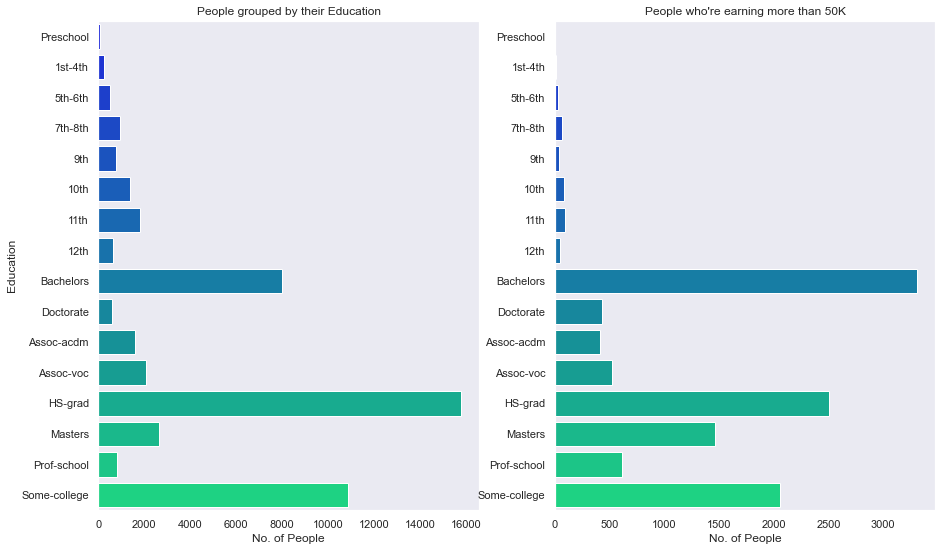

In [50]:
# Grouping people by their education
education_size = Data.groupby('education').size()

# Grouping people who earns more than 50K by their education
more_income = Data.loc[Data['income'] == '>50K', ['education']].groupby('education').size()

sns.set(style = 'dark')
plt.rcParams['figure.figsize'] = [15, 9]
fig, ax = plt.subplots(1,2)

# Setting axes Labels and Titles
ax[0].set_ylabel("Education")
ax[0].set_xlabel("No. of People")
ax[1].set_xlabel("No. of People")
ax[0].title.set_text("People grouped by their Education")
ax[1].title.set_text("People who're earning more than 50K")

# Barplot for the people grouped by their education
sns_ed_1 = sns.barplot(x = list(education_size), y = list(education_size.index), palette = 'winter',
                       order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'Bachelors', 'Doctorate',
                                'Assoc-acdm', 'Assoc-voc', 'HS-grad', 'Masters', 'Prof-school', 'Some-college'], ax = ax[0])

# Barplot for the people who earns more than 50K grouped by their education
sns_ed_2 = sns.barplot(x = list(more_income), y = list(more_income.index), palette = 'winter',
                       order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'Bachelors', 'Doctorate',
                                'Assoc-acdm', 'Assoc-voc', 'HS-grad', 'Masters', 'Prof-school', 'Some-college'], ax = ax[1])

In [63]:
# Grouping people according to their country and their income
df_adult_eda_ = Data[Data['native-country'] != '?']
native_more = df_adult_eda_.loc[df_adult_eda_['income'] == '>50K',['native-country']].groupby('native-country').size()
native_less = df_adult_eda_.loc[df_adult_eda_['income'] == '<=50K',['native-country']].groupby('native-country').size()

index_more = list(native_more.index)
index_less = list(native_less.index)

# Checking if the Countries in both aspects are same or not
print(index_more)
print(len(index_more))
print('====================================================================================================================')
print(index_less)
print(len(index_less))

['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece', 'Guatemala', 'Haiti', 'Honduras', 'Hong', 'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia']
40
['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece', 'Guatemala', 'Haiti', 'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia']
41


In [64]:
# Checking which Countries are not in the list
[country for country in index_less if country not in index_more]

['Holand-Netherlands']

In [65]:
# Making DataFrames of the Data
df_more = pd.DataFrame({'Countries' : index_more, '>50K' : list(native_more) })
df_less = pd.DataFrame({'Countries' : index_less, '<=50K' : list(native_less) })

# Adding the entries of the missing countries
df_more.loc[40] = 'Holand-Netherlands', 0
df_more.loc[41] = 'Outlying-US(Guam-USVI-etc)', 0

df_more

,Countries,>50K
0,Cambodia,9
1,Canada,63
2,China,36
3,Columbia,4
4,Cuba,34
5,Dominican-Republic,5
6,Ecuador,6
7,El-Salvador,11
8,England,47
9,France,16


In [66]:
# Merging both the Data Frames to be used for plotting
df_fin = pd.merge(df_less, df_more, on = 'Countries')

df_fin

,Countries,<=50K,>50K
0,Cambodia,19,9
1,Canada,119,63
2,China,86,36
3,Columbia,81,4
4,Cuba,104,34
5,Dominican-Republic,98,5
6,Ecuador,39,6
7,El-Salvador,144,11
8,England,80,47
9,France,22,16


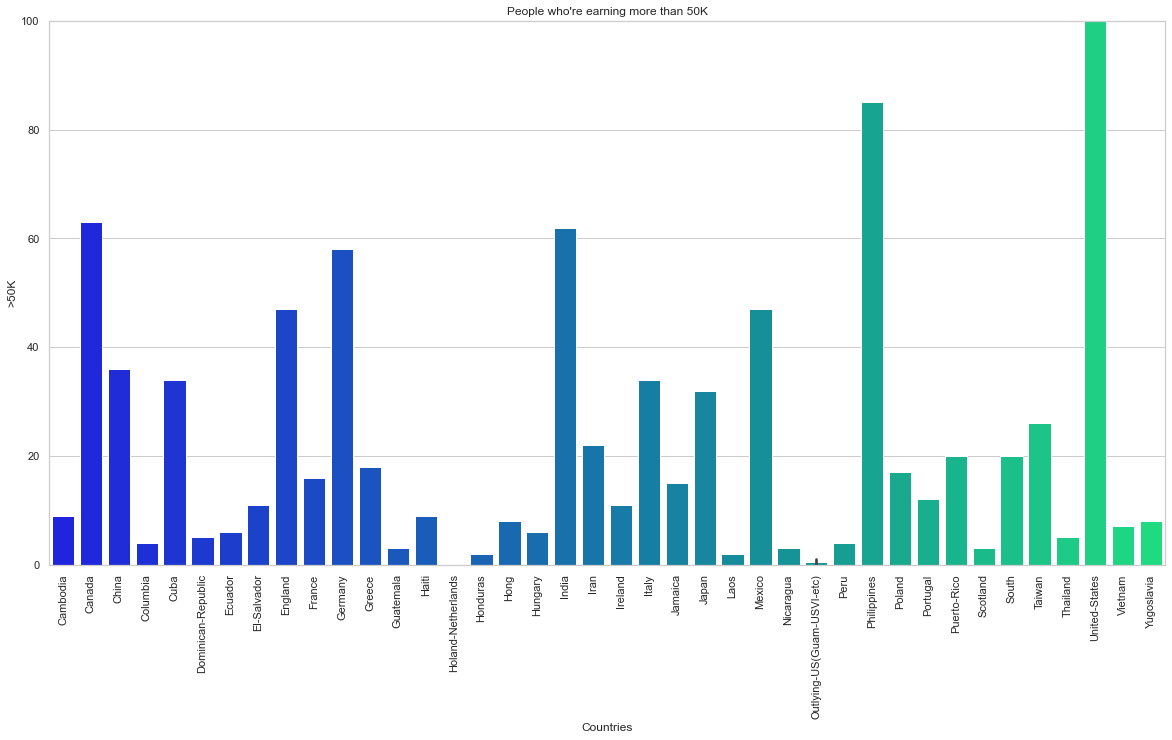

In [72]:
sns.set(style = 'whitegrid')
plt.rcParams['figure.figsize'] = [20,10]
# # Dropping the United States Row as there's a disparity between US and other Countries
# df_fin = df_fin.drop([38])

# This Bar plot shows which country's people after US make more than 50K a year

sns_ = sns.barplot(x = df_fin['Countries'], y = df_fin['>50K'], data = df_fin, palette = 'winter')
plt.ylim(0,100)
sns_.title.set_text("People who're earning more than 50K")

plt.setp(sns_.get_xticklabels(), rotation = 90);

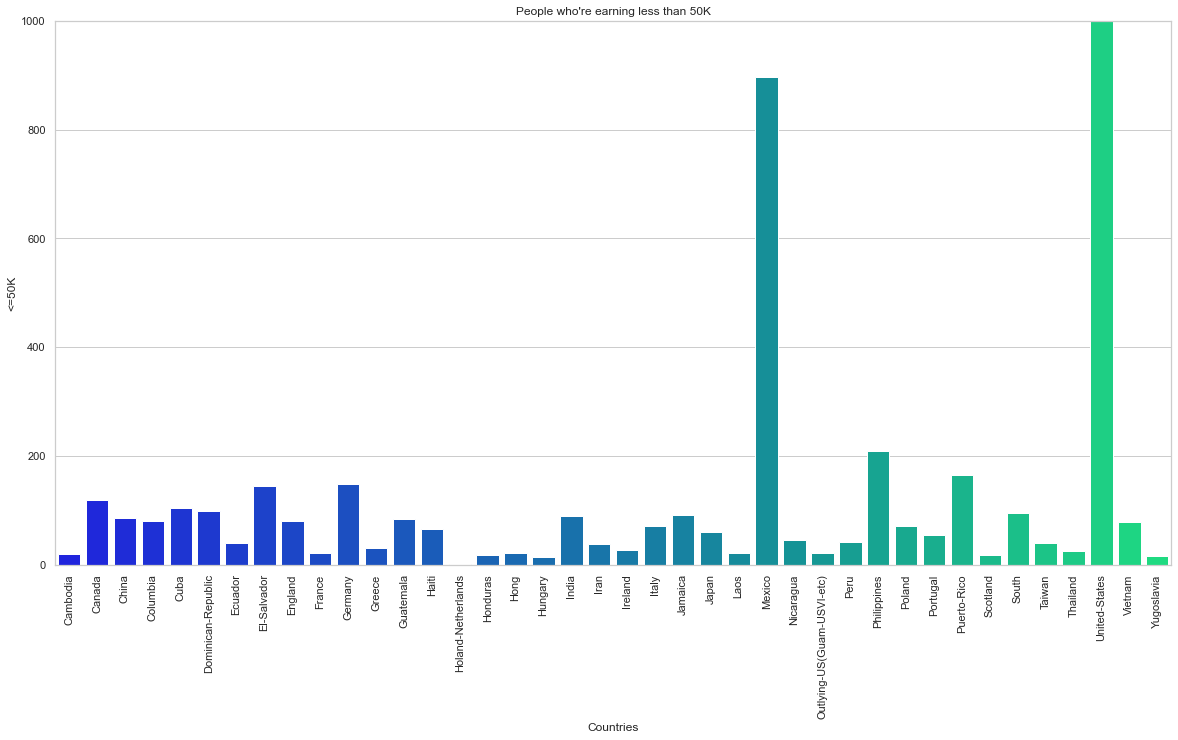

In [76]:
# This Bar plot shows which country's people after US make less than 50K a year

sns__ = sns.barplot(x = df_fin['Countries'], y = df_fin['<=50K'], data = df_fin, palette = 'winter')
sns__.title.set_text("People who're earning less than 50K")
plt.ylim(0,1000)

plt.setp(sns__.get_xticklabels(), rotation = 90);

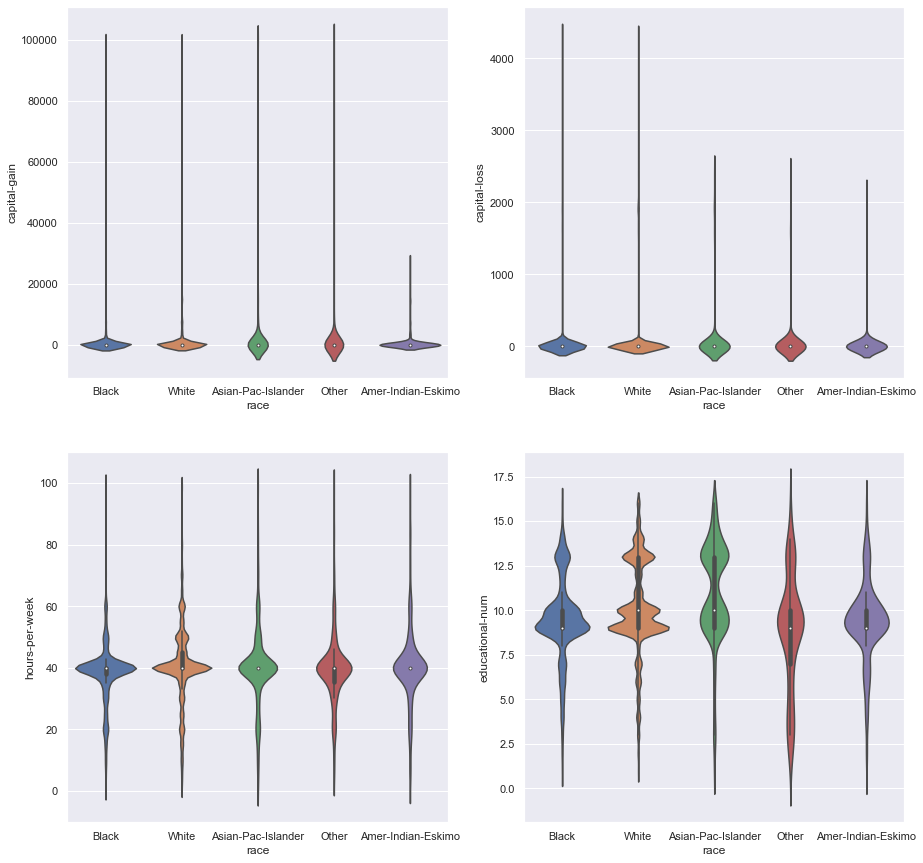

In [78]:
# Setting Parameters
plt.rcParams['figure.figsize'] = [15,15]
sns.set(style = 'darkgrid')

# This Violin plot show how capital gain, loss, hours per week and education vary with the race of the people
plt.subplot(2,2,1)
sns.violinplot(x =Data['race'], y = Data['capital-gain'], data = Data);
plt.subplot(2,2,2)
sns.violinplot(x = Data['race'], y = Data['capital-loss'], data = Data);
plt.subplot(2,2,3)
sns.violinplot(x = Data['race'], y = Data['hours-per-week'], data = Data);
plt.subplot(2,2,4)
sns.violinplot(x = Data['race'], y = Data['educational-num'], data = Data);

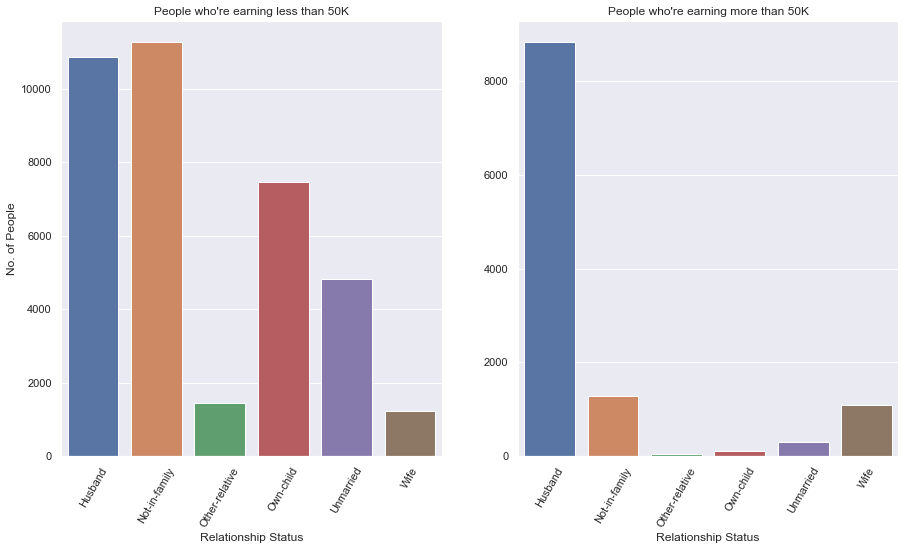

In [79]:
# Setting Parameters
plt.rcParams['figure.figsize'] = [15,8]
fig, ax = plt.subplots(1,2)

# Setting axes Labels and Titles
ax[0].set_ylabel("No. of People")
ax[0].set_xlabel("Relationship Status")
ax[1].set_xlabel("Relationship Status")
ax[0].title.set_text("People who're earning less than 50K")
ax[1].title.set_text("People who're earning more than 50K")

# Grouping people according to their Income and Relationship Status 
rel_less = Data.loc[Data['income'] == '<=50K',['relationship']].groupby('relationship').size()
rel_more = Data.loc[Data['income'] == '>50K',['relationship']].groupby('relationship').size()

# This barplot shows the No.of people earning more or less than 50K according to their Relationship Status
sns_rel_1 = sns.barplot(x = list(rel_less.index), y = list(rel_less), ax = ax[0])
sns_rel_2= sns.barplot(x = list(rel_more.index), y = list(rel_more), ax = ax[1])

plt.setp(sns_rel_1.get_xticklabels(), rotation = 60);
plt.setp(sns_rel_2.get_xticklabels(), rotation = 60);

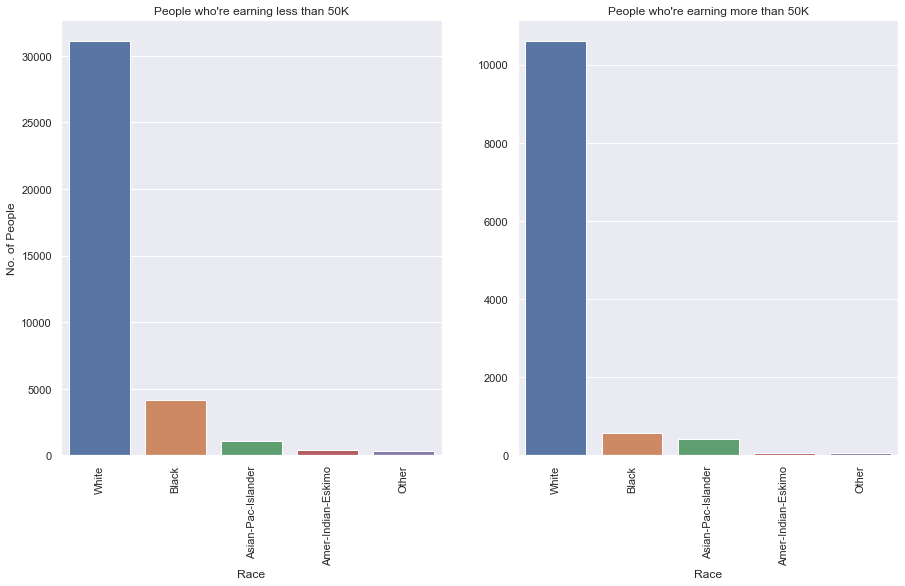

In [80]:
# Setting axes Labels and Titles 
fig, ax = plt.subplots(1,2)
ax[0].set_xlabel('Race')
ax[1].set_xlabel('Race')
ax[0].set_ylabel('No. of People')
ax[0].title.set_text("People who're earning less than 50K")
ax[1].title.set_text("People who're earning more than 50K")

# Grouping People according to their race and income
race_less = Data.loc[Data['income'] == '<=50K'].groupby('race').size()
race_more = Data.loc[Data['income'] == '>50K'].groupby('race').size()

# This barplot shows the no.of people earning more or less than 50K according to their races
sns_race_1 = sns.barplot(x = list(race_less.index), y = list(race_less), ax = ax[0],
                         order = ['White', 'Black','Asian-Pac-Islander', 'Amer-Indian-Eskimo','Other'])
sns_race_2 = sns.barplot(x = list(race_more.index), y = list(race_more), ax = ax[1],
                        order = ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo','Other'])

plt.setp(sns_race_1.get_xticklabels(), rotation = 90);
plt.setp(sns_race_2.get_xticklabels(), rotation = 90);

# Lets Solve the Step number 6

In [81]:
# Finding out the relation between the occupation and the gender columns
pd.crosstab(Data.occupation, Data.gender)

gender,Female,Male
occupation,,
Adm-clerical,3764,1842
Armed-Forces,0,15
Craft-repair,323,5779
Exec-managerial,1748,4334
Farming-fishing,95,1390
Handlers-cleaners,254,1817
Machine-op-inspct,803,2214
Other-service,2697,2222
Priv-house-serv,226,14


In [82]:
# Lets do the chi squared test
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(Data.occupation,Data.gender))

(8699.336001295698,
 0.0,
 13,
 array([[1.85855521e+03, 3.74744479e+03],
        [4.97294472e+00, 1.00270553e+01],
        [2.02299391e+03, 4.07900609e+03],
        [2.01636332e+03, 4.06563668e+03],
        [4.92321527e+02, 9.92678473e+02],
        [6.86597901e+02, 1.38440210e+03],
        [1.00022495e+03, 2.01677505e+03],
        [1.63079434e+03, 3.28820566e+03],
        [7.95671155e+01, 1.60432884e+02],
        [2.97348941e+03, 5.99551059e+03],
        [3.25562114e+02, 6.56437886e+02],
        [1.82374459e+03, 3.67725541e+03],
        [4.79060341e+02, 9.65939659e+02],
        [7.80752321e+02, 1.57424768e+03]]))

In [85]:
Data1 = Data.copy()

# Lets Build the Machine Learning Model On this Data

In [87]:
# Changing the Categorical Values to Numerical values using the Label Encoder
from sklearn.preprocessing import LabelEncoder

categorical_features = list(Data1.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    Data1[feature] = label_encoder_feat[feature].fit_transform(Data1[feature])

Data1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,38,1
4,18,3,103497,15,10,4,9,3,4,0,0,0,30,38,0


In [90]:
# Shuffling the Data Set
from sklearn.utils import shuffle
Data1 = shuffle(Data1)

# Splitting the data set into train and test set
from sklearn.model_selection import train_test_split

features_ = Data1.drop(columns = ['income', 'educational-num'])
target = Data1['income']
X_train, X_test, y_train, y_test = train_test_split(features_, target, test_size = 0.3,random_state = 0)

print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)

Train data set size :  (34152, 13)
Test data set size :  (14637, 13)


In [91]:
# Importing the required libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
import warnings; warnings.simplefilter('ignore')

In [96]:
LR = LogisticRegression(C = 0.5, max_iter = 500)
RFC = RandomForestClassifier(n_estimators = 200)
BNB= BernoulliNB(alpha = 0.3)
SVM = SVC(kernel = 'rbf', max_iter = 1000, probability = True)

models = [LR,RFC,BNB,SVM]
for i in models:
    i.fit(X_train,y_train)
    predictions = i.predict(X_test)
    print("For the model {}".format(i))
    print('')
    print ("The accuracy of model : ",accuracy_score(y_test, predictions))
    print ("The f1 score of model: ", f1_score(y_test, predictions, average = 'binary'))
    print('')
    print('=======================================================================')
    print('')
    

For the model LogisticRegression(C=0.5, max_iter=500)

The accuracy of model :  0.7862266857962698
The f1 score of model:  0.3946604759141033


For the model RandomForestClassifier(n_estimators=200)

The accuracy of model :  0.8545466967274715
The f1 score of model:  0.6733159429185207


For the model BernoulliNB(alpha=0.3)

The accuracy of model :  0.7304092368654779
The f1 score of model:  0.5667545015371103


For the model SVC(max_iter=1000, probability=True)

The accuracy of model :  0.3354512536722006
The f1 score of model:  0.3781883270472416




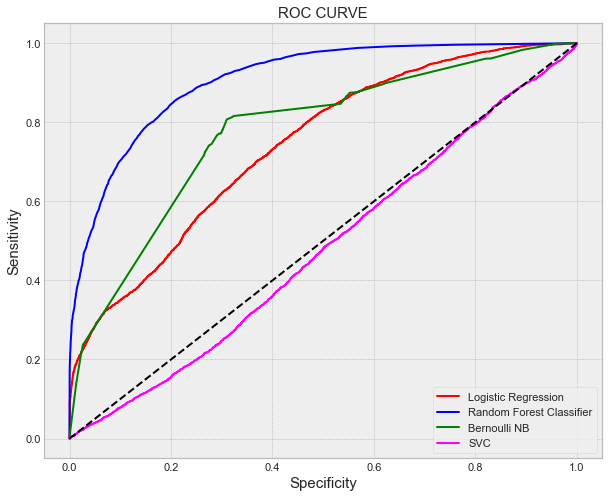

In [100]:
# ROC Curve for the classification models

from sklearn.metrics import roc_auc_score, roc_curve
models = [LR,RFC,BNB,SVM]

model_names = ["Logistic Regression", "Random Forest Classifier",  "Bernoulli NB", "SVC"]


# Setting the parameters for the ROC Curve
plt.rcParams['figure.figsize'] = [10,8]
plt.style.use("bmh")

color = ['red', 'blue', 'green', 'fuchsia', 'cyan']
plt.title("ROC CURVE", fontsize = 15)
plt.xlabel("Specificity", fontsize = 15)
plt.ylabel("Sensitivity", fontsize = 15)
i = 1

for i, model in enumerate(models) :
    prob = model.predict_proba(X_test)
    prob_positive = prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test, prob_positive)
    plt.plot(fpr, tpr, color = color[i])
    plt.gca().legend(model_names, loc = 'lower right', frameon = True)

plt.plot([0,1],[0,1], linestyle = '--', color = 'black')
plt.show()